In [1]:
import numpy as np
import sklearn
from sklearn.manifold import TSNE

RandomState = 20180610

import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

In [2]:
from label_data import get_labeled_data

# 价格预测1 特征提取的可视化与准确率召回率计算

## 1 验证特征的提取与数据的标注

## 1.1 标注方法

1. 数据抖动十分剧烈，故我们取一段时间内的成交均价作为这一段时间内的价格进行数据的预处理
2. 使用前10s的数据对之后5s的数据进行标注，标注的依据是一段时间内成交价格的平均值
3. 数据的特征：每隔2s的成交价平均值作为一个维度，组成特征前5维，最高价最低价成交量作为后3个维度

## 1.2 标注结果展示

- 下图展示出标注结果，将预测此后即将上涨的点标为红色，预测此后即将下跌的点标为绿色，其余点标为黑色，可以看出标注结果与实际相符
- 标注结果的大图可以在```pictures```文件夹下找到

In [3]:
from show_data import show_data

number of 0 3500
number of 1 17450
number of 2 3890


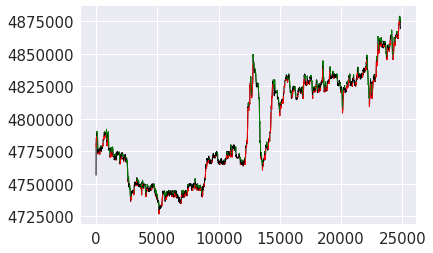

In [4]:
(data, label) = get_labeled_data([0])
means = []
for i in range(len(data['A1'])):
    means.append(data['A1'][i][8])
print('number of 0', label['A1'].count(0))
print('number of 1', label['A1'].count(1))
print('number of 2', label['A1'].count(2))
#print(means)
#print(label['A1'])
show_data('A1', ['price'], means, label['A1'])

## 2 特征空间中聚类分析

- 使用t-SNE方法可视化高维数据（图片保存在```pictures/extracted_features.png```）

In [5]:
dat, lab = get_labeled_data(range(1))
dat = np.array(dat['A1'])
lab = np.array(lab['A1'])

In [6]:
new_dat = dat[2000:4000, 0:5]
new_dat = new_dat / np.max(np.abs(new_dat), axis = 1).reshape(-1, 1)

In [7]:
tsne_res = TSNE(random_state = RandomState).fit_transform(new_dat[:, 0:5])

In [8]:
def scatter(x, colors):
    # choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 3))
    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)], alpha = 0.8)
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')
    # add the labels for each digit.
    txts = []
    for i in range(3):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    return f, ax, sc, txts

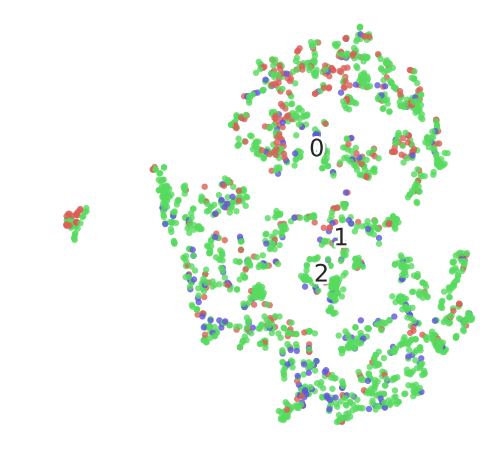

In [9]:
scatter(tsne_res, lab[2000:4000])
plt.savefig('../pictures/extracted_features.png', dpi=120)
plt.show()

- 从结果可以看出，0（随后下跌）的数据点主要聚集在右上角，1（基本不变）的数据点分布广泛，2（随后上涨）的数据点主要集中在左下角
- 从当前的特征进行聚类可能会出现的问题是召回率偏低，即可能会将一些非上涨/下降的点预测为上涨/下跌

## 3 准确率与召回率分析

In [10]:
from predict import test_the_accuracy

In [11]:
test_the_accuracy()

loaded
Model A1 accuracy :  0.453482765835509
Model A1 recall up :  0.2034523735067859
Model A1 recall down :  0.27643288319123777
Model A1 recall flat :  0.5413579216376222 

Model A3 accuracy :  0.24976938221971334
Model A3 recall up :  0.6299513551077137
Model A3 recall down :  0.4657419786096257
Model A3 recall flat :  0.03892153473902523 

Model B2 accuracy :  0.5453190524240208
Model B2 recall up :  0.9993362267041103
Model B2 recall down :  0.01288936627282492
Model B2 recall flat :  0.0031398208326014402 

Model B3 accuracy :  0.27794761848043303
Model B3 recall up :  0.7301327514093472
Model B3 recall down :  0.08204498977505112
Model B3 recall flat :  0.21335146833645563 



- 准确率与召回率汇总如下

类别 | 准确率 | 上涨召回率 | 下降召回率 | 不变召回率 
--- | --- | --- | --- | --- 
A1 | 45.35% | 20.35% | 27.64% | 54.14%
A3 | 24.98% | 63.00% | 46.57% | 3.89%
B2 | 54.53% | 99.93% | 1.29% | 0.31%
B3 | 27.79% | 73.01% | 8.20% | 21.33%